In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.manifold import TSNE
import math

In [3]:
# read the training data
train = pd.read_csv("/content/drive/MyDrive/datasets/cs2/train.csv")
test = pd.read_csv("/content/drive/MyDrive/datasets/cs2/test.csv")
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None


In [ ]:
print(train.shape, test.shape)
print(train.head(2), test.head(2))

(200000, 202) (200000, 201)
   ID_code  target    var_0   var_1  ...  var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863  ...   7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473  ...   8.1267   8.7889  18.3560   1.9518

[2 rows x 202 columns]   ID_code    var_0   var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656  7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304  1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760

[2 rows x 201 columns]


In [ ]:
# number of duplicate rows in train data - no duplicates
duplicate_train = train[train.duplicated()]
print("Duplicate train Rows :")  
print(duplicate_train)

duplicate_test = test[test.duplicated()]
print("Duplicate test Rows :")  
print(duplicate_test)

Duplicate train Rows :
Empty DataFrame
Columns: [ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, var_50, var_51, var_52, var_53, var_54, var_55, var_56, var_57, var_58, var_59, var_60, var_61, var_62, var_63, var_64, var_65, var_66, var_67, var_68, var_69, var_70, var_71, var_72, var_73, var_74, var_75, var_76, var_77, var_78, var_79, var_80, var_81, var_82, var_83, var_84, var_85, var_86, var_87, var_88, var_89, var_90, var_91, var_92, var_93, var_94, var_95, var_96, var_97, ...]
Index: []

[0 rows x 202 columns]
Duplicate test Rows :
Empty DataFrame
Columns: [ID_code, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, v

In [ ]:
# checking for null values in train data - there are no rows with null values
nan_rows_train = train[train.isnull().any(1)]
nan_rows_test = test[test.isnull().any(1)]
print(nan_rows_train, nan_rows_test)

Empty DataFrame
Columns: [ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, var_50, var_51, var_52, var_53, var_54, var_55, var_56, var_57, var_58, var_59, var_60, var_61, var_62, var_63, var_64, var_65, var_66, var_67, var_68, var_69, var_70, var_71, var_72, var_73, var_74, var_75, var_76, var_77, var_78, var_79, var_80, var_81, var_82, var_83, var_84, var_85, var_86, var_87, var_88, var_89, var_90, var_91, var_92, var_93, var_94, var_95, var_96, var_97, ...]
Index: []

[0 rows x 202 columns] Empty DataFrame
Columns: [ID_code, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14,

## Train and test data observations:
- Train data contains 200k*202 shape.
- Test data contains 200k*201 shape. Target is the missing column here
- Both in Train and Test data there are "no duplicate and missing values"

## Univariate analysis

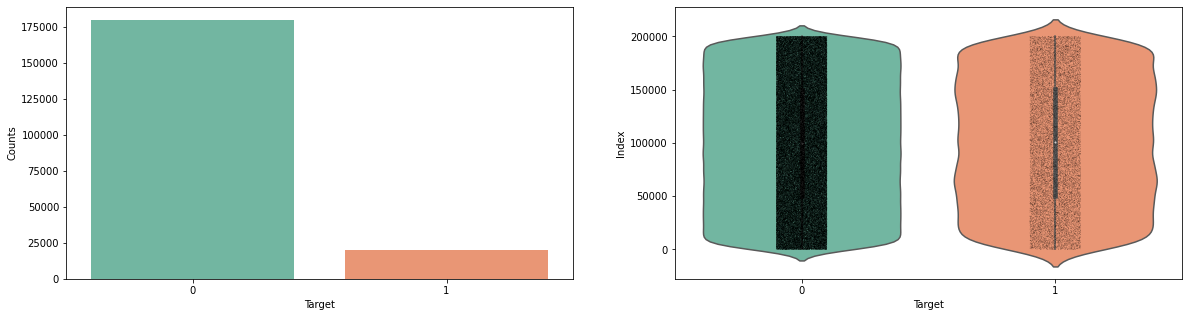

In [ ]:
# distribution of targets in train data - clearly imbalanced
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(train.target.values, ax=ax[0], palette="Set2")
sns.violinplot(x=train.target.values, y=train.index.values, ax=ax[1], palette="Set2")
sns.stripplot(x=train.target.values, y=train.index.values,
              jitter=True, ax=ax[1], color="black", size=0.5, alpha=0.5)
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index");
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts");

In [ ]:
# ID_code - is not useful as its equal to # of rows
print("unique train id's: ", train.ID_code.nunique())
print("unique test id's: ", test.ID_code.nunique())

unique train id's:  200000
unique test id's:  200000


In [ ]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

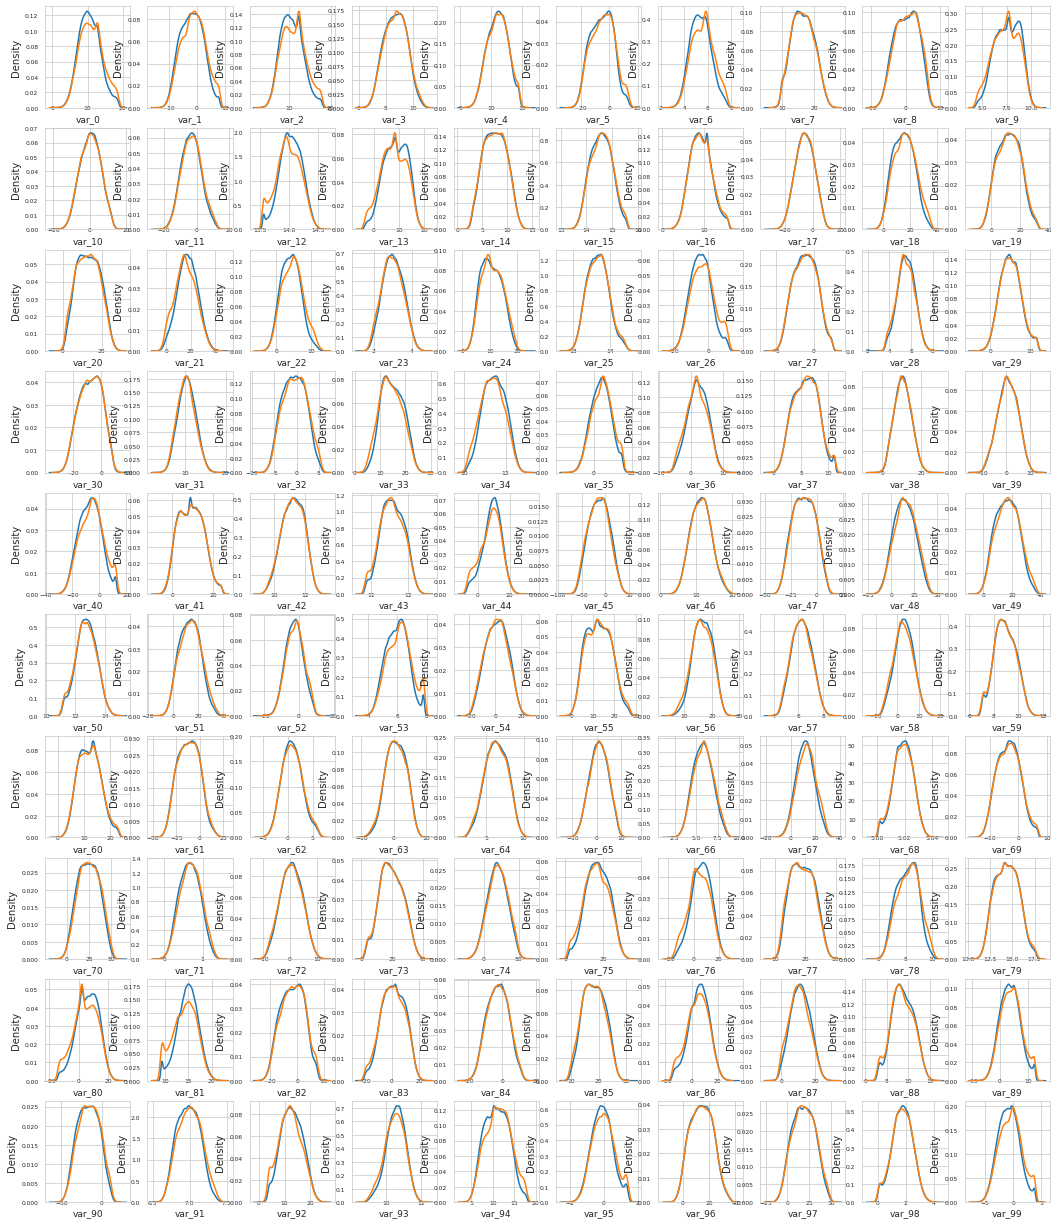

In [ ]:
# distribution plots for the first 100 elements
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

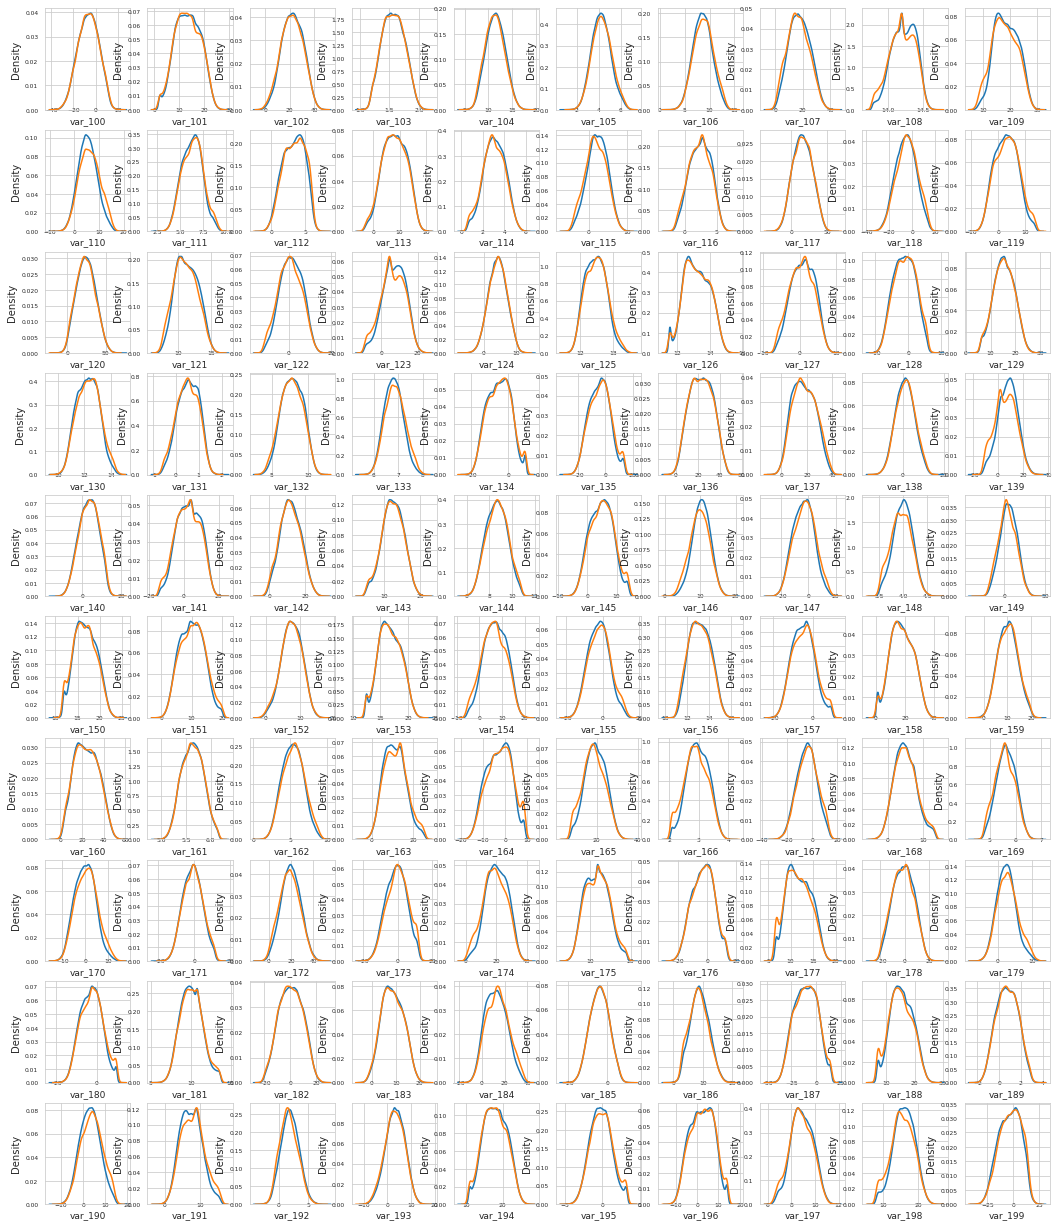

In [ ]:
# distribution plots for the next 100 elements
features = train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

## Univariate analysis observations:
- Target is clearly imbalanced, ~10% of customers do the transaction rest do not
- Take a look at the jitter plots within the violinplots. We can see that the targets look uniformly distributed over the indexes. Once more this indicates that the data is simulated.
- If we look at the distribution plots majority of them overlap between both the classes, there are a couple of features like var0, var2, var6, var9, etc. where there is a difference which may be one of our important features to seperate the classes

## Question: Are Train and Test sets of the same distribution? 
### Answer: Yes since we tried using logistic regression to split the train and test sets and we get an roc score of 0.51 both train and test datasets are of the same distribution

In [ ]:
x1 = train.drop(["ID_code", "target"], 1)
x2 = test.drop(["ID_code"], 1)
x1.shape, x2.shape

((200000, 200), (200000, 200))

In [ ]:
# creating psuedo targets 1 for train set and 0 for test set
x1["psuedo_target"] = 1
x2["psuedo_target"] = 0
x1.shape, x2.shape

((200000, 201), (200000, 201))

In [ ]:
x3 = pd.concat([x1,x2])
x3.shape

(400000, 201)

In [ ]:
# using logistic regression to see if distributions of train and test datasets are the same
%%time
x = x3.drop(["psuedo_target"], 1)
y = x3.psuedo_target

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression()
lr.fit(x, y)
y_hat = lr.predict(x)
print(roc_auc_score(y, y_hat))

0.5131699999999999
CPU times: user 35.7 s, sys: 5.71 s, total: 41.4 s
Wall time: 21.5 s


## Multivariate analysis

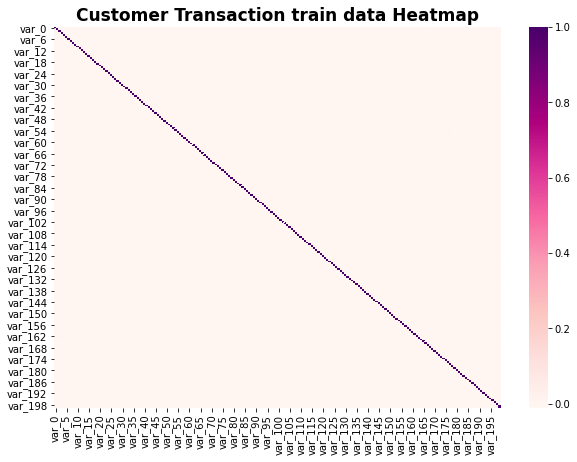

In [ ]:
# check corr between features - no corr between features
'''
As we can see from the heatmap there is no corr between features in the train data
'''
corr = train.drop(["target", "ID_code"], 1).corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='RdPu')
plt.title("Customer Transaction train data Heatmap", fontweight="bold", fontsize=17)
plt.show()

In [ ]:
# Check if dim reduction works - 2 dim only represent 1% of the data hence dim reduction would not work

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = train.drop(["target", "ID_code"], axis=1)
y = train['target']

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler_df = pd.DataFrame(x_scaler, columns=x.columns)

pca = PCA(n_components=2)
x_scaler_pca = pca.fit_transform(x_scaler)
x_scaler_pca_df = pd.DataFrame(x_scaler_pca)

print("Results of variance : {}".format(sum(pca.explained_variance_ratio_)))

Results of variance : 0.010632977613159256


## Multivariate Analysis observations:
- None of the features(X) are corr to each other, another reason why the data is simulated
- We cannot decompose here as we can see post applying PCA and bringing down to 2 features we can barely explain only ~1% of the total variance

## Feature Engineering - new feature generation
- min, max, mean, std, etc..

In [ ]:
%%time
idx = features = train.columns.values[2:202]
for df in [test, train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 7.99 s, sys: 657 ms, total: 8.65 s
Wall time: 8.63 s


<Figure size 432x288 with 0 Axes>

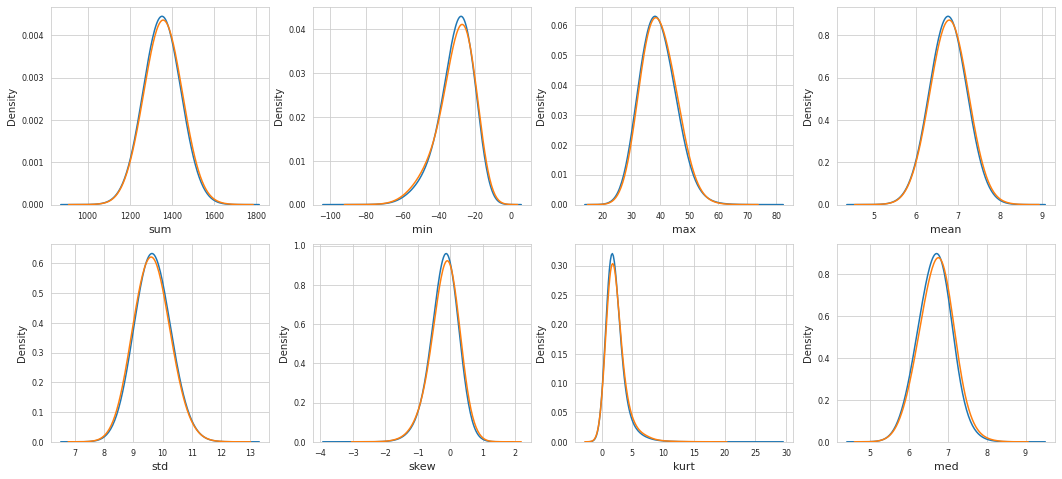

In [ ]:
# plotting the new features
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show()

t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[202:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

### The distributions of the above new generated features mostly overlap and would not be of much use for our classification problem 

## Removing "fake" samples from test data

#### credits: https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split

In [4]:
from tqdm import tqdm

In [5]:
# get your test columns
test_columns = []
for elem in test.columns:
  if "var" in elem:
    test_columns.append(elem)

In [6]:
df_test = test[test_columns]

df_test = df_test.values

unique_samples = []
unique_count = np.zeros_like(df_test)
for feature in tqdm(range(df_test.shape[1])):
    _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))

100%|██████████| 200/200 [00:06<00:00, 32.13it/s]


100000
100000


In [7]:
df_test_real = df_test[real_samples_indexes].copy()

generator_for_each_synthetic_sample = []
# Using 20,000 samples should be enough. 
# You can use all of the 100,000 and get the same results (but 5 times slower)
for cur_sample_index in tqdm(synthetic_samples_indexes[:20000]):
    cur_synthetic_sample = df_test[cur_sample_index]
    potential_generators = df_test_real == cur_synthetic_sample

    # A verified generator for a synthetic sample is achieved
    # only if the value of a feature appears only once in the
    # entire real samples set
    features_mask = np.sum(potential_generators, axis=0) == 1
    verified_generators_mask = np.any(potential_generators[:, features_mask], axis=1)
    verified_generators_for_sample = real_samples_indexes[np.argwhere(verified_generators_mask)[:, 0]]
    generator_for_each_synthetic_sample.append(set(verified_generators_for_sample))

100%|██████████| 20000/20000 [33:44<00:00,  9.88it/s]


In [8]:
public_LB = generator_for_each_synthetic_sample[0]
for x in tqdm(generator_for_each_synthetic_sample):
    if public_LB.intersection(x):
        public_LB = public_LB.union(x)

private_LB = generator_for_each_synthetic_sample[1]
for x in tqdm(generator_for_each_synthetic_sample):
    if private_LB.intersection(x):
        private_LB = private_LB.union(x)
        
print(len(public_LB))
print(len(private_LB))

100%|██████████| 20000/20000 [00:17<00:00, 1129.26it/s]

50000
50000


In [9]:
np.save('/content/drive/MyDrive/datasets/cs2/public_LB', list(public_LB))
np.save('/content/drive/MyDrive/datasets/cs2/private_LB', list(private_LB))
np.save('/content/drive/MyDrive/datasets/cs2/synthetic_samples_indexes', list(synthetic_samples_indexes))

In [16]:
np.max(train.iloc[:, 2:].values), np.min(train.iloc[:, 2:].values)

(74.0321, -90.2525)

## frequency encoding

#### credits: https://www.kaggle.com/cdeotte/200-magical-models-santander-0-920

In [17]:
# FREQUENCY ENCODE
def encode_FE(df,col,test):
    cv = df[col].value_counts()
    nm = col+'_FE'
    df[nm] = df[col].map(cv)
    test[nm] = test[col].map(cv)
    test[nm].fillna(0,inplace=True)
    if cv.max()<=255:
        df[nm] = df[nm].astype('uint8')
        test[nm] = test[nm].astype('uint8')
    else:
        df[nm] = df[nm].astype('uint16')
        test[nm] = test[nm].astype('uint16')        
    return

test['target'] = -1
comb = pd.concat([train,test.loc[real_samples_indexes]],axis=0,sort=True)
for i in tqdm(range(200)): 
  encode_FE(comb,'var_'+str(i),test)

train = comb[:len(train)]; del comb
print('Added 200 new magic features!')

Added 200 new magic features!


In [43]:
test = test.drop(["target"], axis=1)
print("final shape of train and test: ", train.shape, test.shape)

final shape of train and test:  (200000, 402) (200000, 401)


In [53]:
# saving the file for modelling phase
train.to_csv("/content/drive/MyDrive/datasets/cs2/train_FE.csv", index=False)
test.to_csv("/content/drive/MyDrive/datasets/cs2/test_FE.csv", index=False)